## Summary Stats for clustered vital 1k + links dataset

**Author:** Jim Maddock

**Last Updated:** 6-8-20

**Description:** Some basic summary stats for clustered dataset produced by edcast, including distribution of cluster sizes and weights (closeness of article to centroid of cluster)

In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

### Notebook Setup
Import data from json file and create pandas dataframe in order to run basic summary stats.  Dataframe creation takes a long time to run.

In [2]:
FILEPATH = '/Users/klogg/research_data/wmf_knowledge_graph/wiki_5-28-20/wiki_1000_clusters_6-8-20.json'

with open(FILEPATH) as json_file:
    cluster_65 = json.load(json_file)

In [3]:
df = pd.DataFrame()

for i, cluster in enumerate(cluster_65):
    chunk = []
    for article in cluster_65[cluster]['items']:
        row = {
            'label':cluster_65[cluster]['label'],
            'cluster':cluster_65[cluster]['cluster'],
            'w':article['w'],
            'title':article['title']
        }
        chunk.append(row)
    df = df.append(pd.DataFrame(chunk))
    print('finished cluster: {0}'.format(i))

finished cluster: 0
finished cluster: 1
finished cluster: 2
finished cluster: 3
finished cluster: 4
finished cluster: 5
finished cluster: 6
finished cluster: 7
finished cluster: 8
finished cluster: 9
finished cluster: 10
finished cluster: 11
finished cluster: 12
finished cluster: 13
finished cluster: 14
finished cluster: 15
finished cluster: 16
finished cluster: 17
finished cluster: 18
finished cluster: 19
finished cluster: 20
finished cluster: 21
finished cluster: 22
finished cluster: 23
finished cluster: 24
finished cluster: 25
finished cluster: 26
finished cluster: 27
finished cluster: 28
finished cluster: 29
finished cluster: 30
finished cluster: 31
finished cluster: 32
finished cluster: 33
finished cluster: 34
finished cluster: 35
finished cluster: 36
finished cluster: 37
finished cluster: 38
finished cluster: 39
finished cluster: 40
finished cluster: 41
finished cluster: 42
finished cluster: 43
finished cluster: 44
finished cluster: 45
finished cluster: 46
finished cluster: 47
fi

finished cluster: 386
finished cluster: 387
finished cluster: 388
finished cluster: 389
finished cluster: 390
finished cluster: 391
finished cluster: 392
finished cluster: 393
finished cluster: 394
finished cluster: 395
finished cluster: 396
finished cluster: 397
finished cluster: 398
finished cluster: 399
finished cluster: 400
finished cluster: 401
finished cluster: 402
finished cluster: 403
finished cluster: 404
finished cluster: 405
finished cluster: 406
finished cluster: 407
finished cluster: 408
finished cluster: 409
finished cluster: 410
finished cluster: 411
finished cluster: 412
finished cluster: 413
finished cluster: 414
finished cluster: 415
finished cluster: 416
finished cluster: 417
finished cluster: 418
finished cluster: 419
finished cluster: 420
finished cluster: 421
finished cluster: 422
finished cluster: 423
finished cluster: 424
finished cluster: 425
finished cluster: 426
finished cluster: 427
finished cluster: 428
finished cluster: 429
finished cluster: 430
finished c

finished cluster: 769
finished cluster: 770
finished cluster: 771
finished cluster: 772
finished cluster: 773
finished cluster: 774
finished cluster: 775
finished cluster: 776
finished cluster: 777
finished cluster: 778
finished cluster: 779
finished cluster: 780
finished cluster: 781
finished cluster: 782
finished cluster: 783
finished cluster: 784
finished cluster: 785
finished cluster: 786
finished cluster: 787
finished cluster: 788
finished cluster: 789
finished cluster: 790
finished cluster: 791
finished cluster: 792
finished cluster: 793
finished cluster: 794
finished cluster: 795
finished cluster: 796
finished cluster: 797
finished cluster: 798
finished cluster: 799
finished cluster: 800
finished cluster: 801
finished cluster: 802
finished cluster: 803
finished cluster: 804
finished cluster: 805
finished cluster: 806
finished cluster: 807
finished cluster: 808
finished cluster: 809
finished cluster: 810
finished cluster: 811
finished cluster: 812
finished cluster: 813
finished c

### Summary Stats

* number of pages and clusters
* distributions of pages per cluster: looks relatively normal, skewed to fewer pages per cluster
* page weights
    * relatively normally distributed and tightly clustered: median ~0.36, std ~0.12
    * mean, quartiles, min, max, std for weights per cluster: median ~0.36, std ~0.12

In [4]:
print('number of pages: {0}'.format(len(df)))
print('number of clusters: {0}'.format(len(df['cluster'].unique())))

number of pages: 62043
number of clusters: 1000


### Articles per cluster stats
Distributions of pages per cluster: looks relatively normal, skewed to fewer pages per cluster.  No Cluster smaller than 230 articles.

In [5]:
articles_per_cluster = df.groupby('cluster').size()
articles_per_cluster.describe()

count    1000.000000
mean       62.043000
std        42.852392
min         3.000000
25%        32.000000
50%        51.000000
75%        83.000000
max       309.000000
dtype: float64

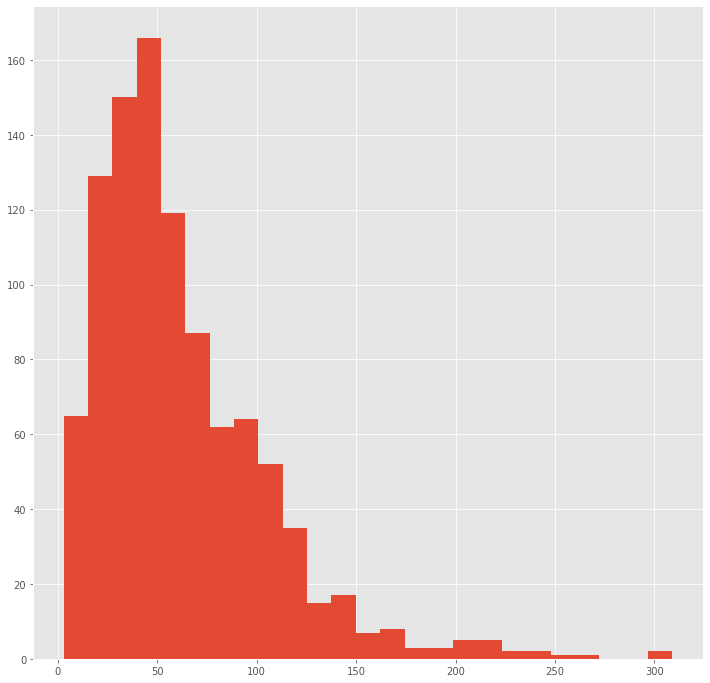

In [9]:
articles_per_cluster.hist(bins=25,figsize=(12,12))

### Weights per cluster stats
* relatively normally distributed and tightly clustered: median ~0.36, std ~0.12
* mean, quartiles, min, max, std for weights per cluster: median ~0.36, std ~0.12

In [10]:
df['w'].describe()

count    62043.000000
mean         0.534085
std          0.133938
min          0.141157
25%          0.431837
50%          0.527926
75%          0.632524
max          0.945915
Name: w, dtype: float64

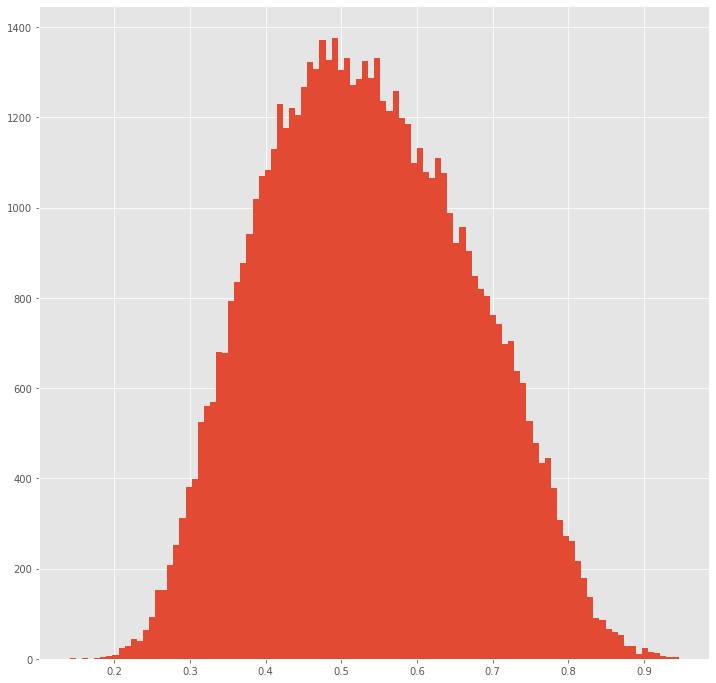

In [11]:
df['w'].hist(bins=100,figsize=(12,12))

In [12]:
weights_per_cluster = df.groupby('label')['w'].describe().sort_values('50%')

In [13]:
weights_per_cluster.describe()

,count,mean,std,min,25%,50%,75%,max
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,62.043000,0.528595,0.123261,0.281000,0.441797,0.528799,0.614156,0.791325
std,42.852392,0.055910,0.023594,0.046066,0.055650,0.068373,0.074765,0.077351
min,3.000000,0.390247,0.038786,0.141157,0.326315,0.377260,0.425458,0.559574
25%,32.000000,0.488362,0.107694,0.253300,0.399771,0.477835,0.559114,0.737992
50%,51.000000,0.527800,0.124198,0.277567,0.433363,0.522043,0.619628,0.802625
75%,83.000000,0.568058,0.138072,0.303757,0.474744,0.577208,0.669889,0.853170
max,309.000000,0.738964,0.195021,0.661240,0.691561,0.743241,0.791067,0.945915


### Overview of cluster names, weights, size

In [83]:
df.groupby('label')['w'].describe().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
desert_oblast_comedy_earthquake,338.0,0.335135,0.143578,0.114629,0.227182,0.291110,0.430023,0.752576
christmas_family_list_kinship,468.0,0.326797,0.118944,0.087296,0.233893,0.306855,0.398202,0.727331
river_mountain_peninsula_north,1199.0,0.321563,0.092622,0.078761,0.256023,0.312635,0.378590,0.655415
greek_ancient_roman_list,778.0,0.329336,0.106640,0.090396,0.247311,0.316695,0.401373,0.702117
paper_glass_color_print,853.0,0.324098,0.089620,0.081981,0.255496,0.321006,0.388750,0.597441
company_new_medium_oil,1063.0,0.329345,0.086286,0.110337,0.265994,0.321912,0.383017,0.630123
day_year_calendar_child,749.0,0.338616,0.114535,0.076554,0.254353,0.322265,0.398338,0.737577
acid_carbon_chemistry_reaction,955.0,0.329610,0.095065,0.074058,0.262892,0.325647,0.396868,0.646098
english_word_language_grammar,1095.0,0.337146,0.096431,0.120727,0.266220,0.327570,0.395630,0.694643
